<a href="https://colab.research.google.com/github/shriya2112/PCOS-Diagnosis-Prediction-with-Explainable-ML-Models/blob/main/Project584.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Resampled class distribution:
 PCOS_Diagnosis
0    561
1    561
Name: count, dtype: int64
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       240
           1       0.80      0.93      0.86        60

    accuracy                           0.94       300
   macro avg       0.89      0.94      0.91       300
weighted avg       0.95      0.94      0.94       300



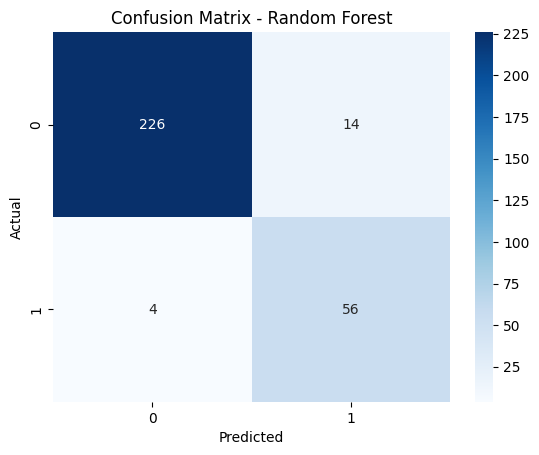

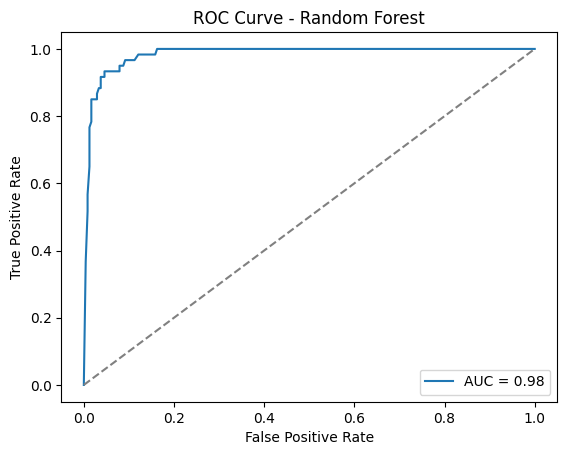


XGBoost Accuracy: 0.9433
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       240
           1       0.82      0.92      0.87        60

    accuracy                           0.94       300
   macro avg       0.90      0.93      0.92       300
weighted avg       0.95      0.94      0.94       300



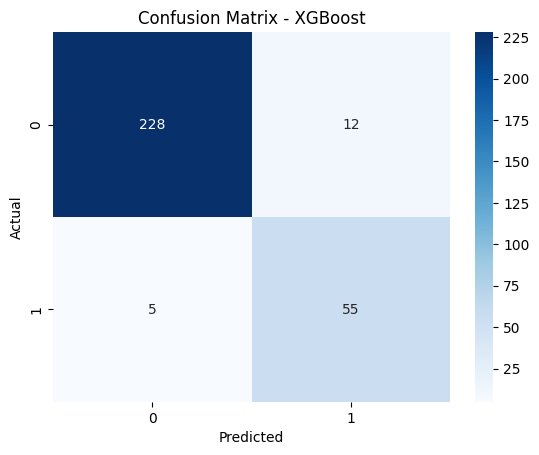

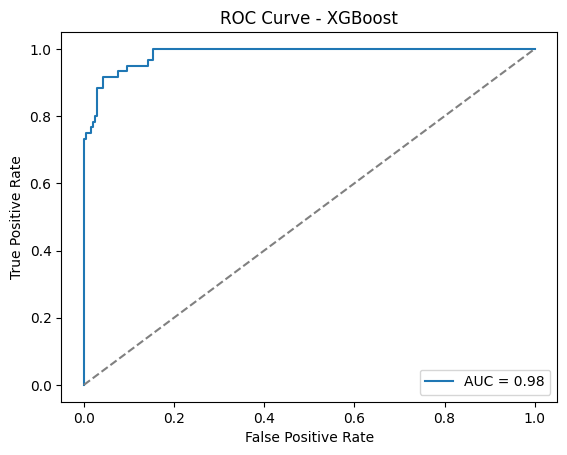


Stacked Ensemble Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       240
           1       0.83      0.92      0.87        60

    accuracy                           0.95       300
   macro avg       0.91      0.94      0.92       300
weighted avg       0.95      0.95      0.95       300



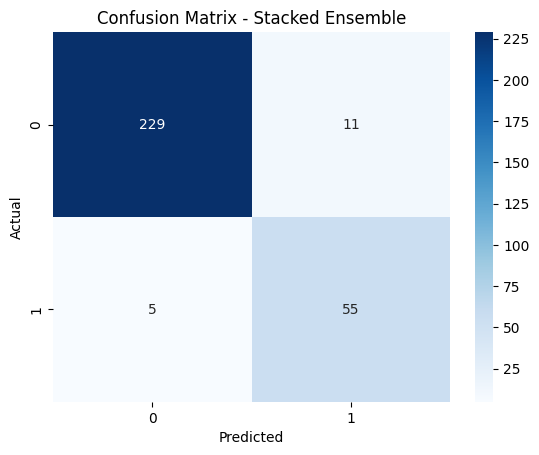

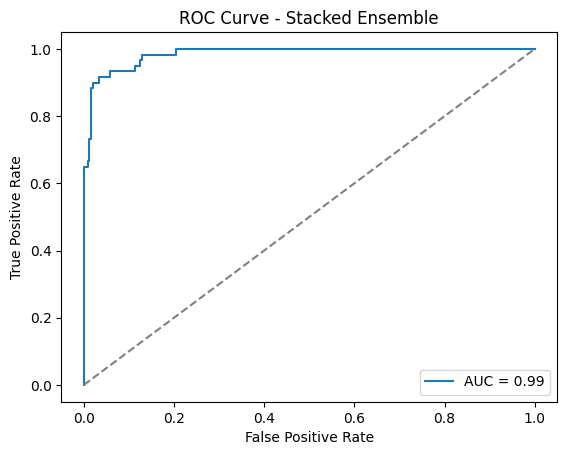

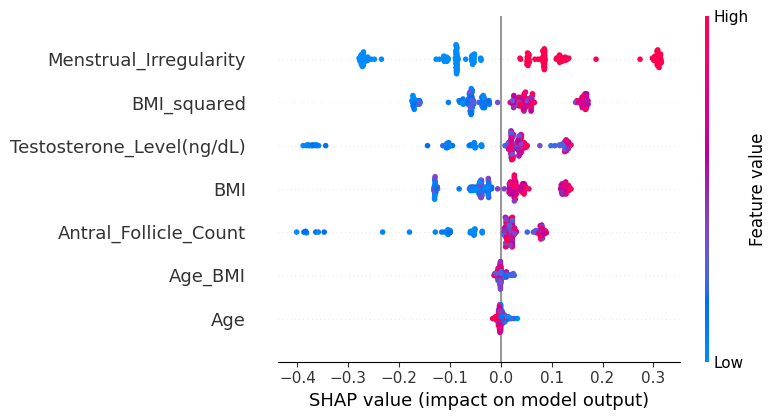

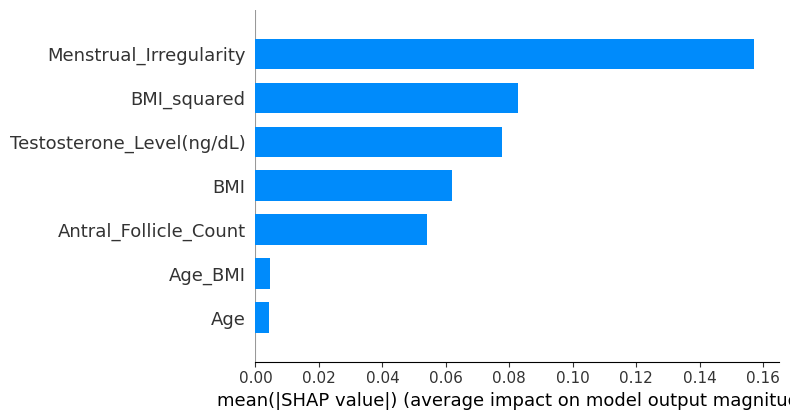


Cross-Validation Scores:
Accuracy: 0.938 ± 0.013
Precision: 0.861 ± 0.048
Recall: 0.824 ± 0.042
F1: 0.841 ± 0.034


In [ ]:
# Install required libraries (Google Colab)
!pip install xgboost shap imbalanced-learn umap-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/pcos_dataset.csv')

# Create engineered features
df['Age_BMI'] = df['Age'] * df['BMI']
df['BMI_squared'] = df['BMI'] ** 2

# Include diagnostic features to boost model performance
selected_features = [
    'Age', 'BMI', 'Age_BMI', 'BMI_squared',
    'Testosterone_Level(ng/dL)',
    'Menstrual_Irregularity',
    'Antral_Follicle_Count'
]
X = df[selected_features]
y = df['PCOS_Diagnosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=5, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:\n", pd.Series(y_train).value_counts())

# Random Forest GridSearch
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators':[100,150], 'max_depth':[10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Random Forest best parameters:", grid_rf.best_params_)

# XGBoost GridSearch
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
params_xgb = {'n_estimators':[100],'max_depth':[5,7],'learning_rate':[0.05,0.1]}
grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("XGBoost best parameters:", grid_xgb.best_params_)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_),
        ('lr', logreg)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_clf.fit(X_train, y_train)

# Evaluate models
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.2f}')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

# Evaluate each
evaluate_model("Random Forest", grid_rf.best_estimator_)
evaluate_model("XGBoost", grid_xgb.best_estimator_)
evaluate_model("Stacked Ensemble", stacking_clf)

# SHAP Analysis
X_full = df[selected_features]
y_full = df['PCOS_Diagnosis']
rf_shap = RandomForestClassifier(random_state=42)
rf_shap.fit(X_full, y_full)
X_sub = shap.sample(X_full, 200, random_state=42)
explainer = shap.Explainer(rf_shap, X_sub)
shap_values = explainer(X_sub)
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, show=False)
plt.tight_layout()
plt.show()
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Cross-validation metrics
rf_cv = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'], random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorers = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}
print("\nCross-Validation Scores:")
for name, scorer in scorers.items():
    scores = cross_val_score(rf_cv, X_umap, y, cv=skf, scoring=scorer)
    print(f"{name.capitalize()}: {scores.mean():.3f} ± {scores.std():.3f}")

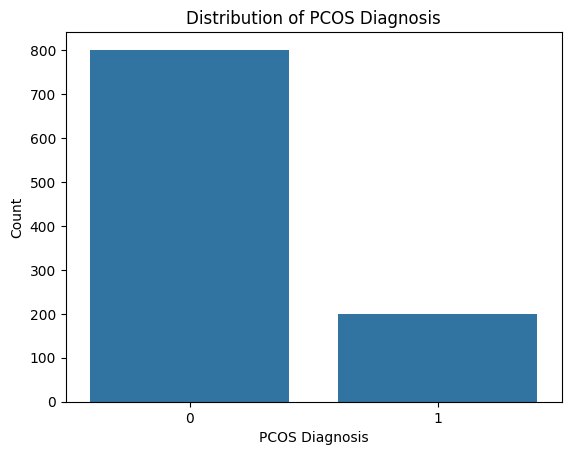

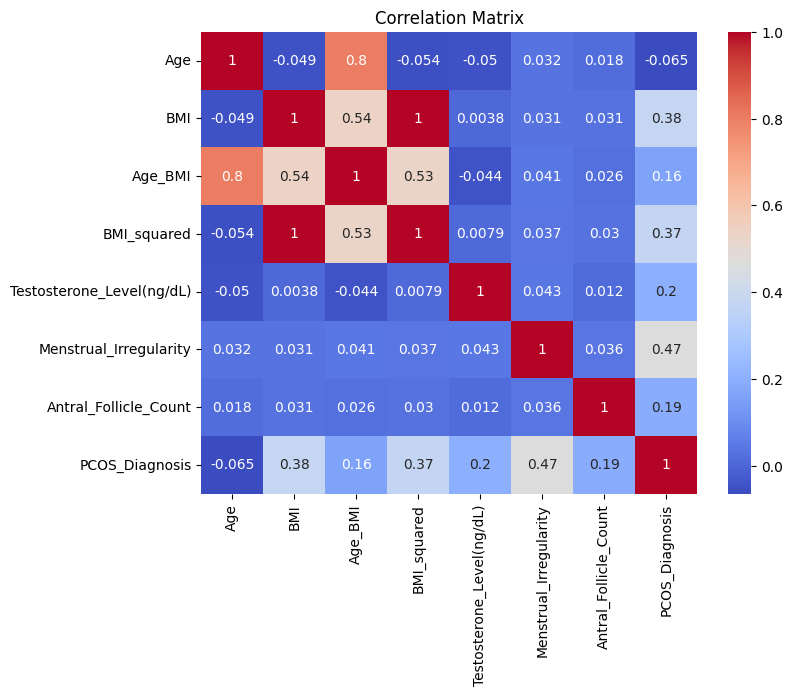

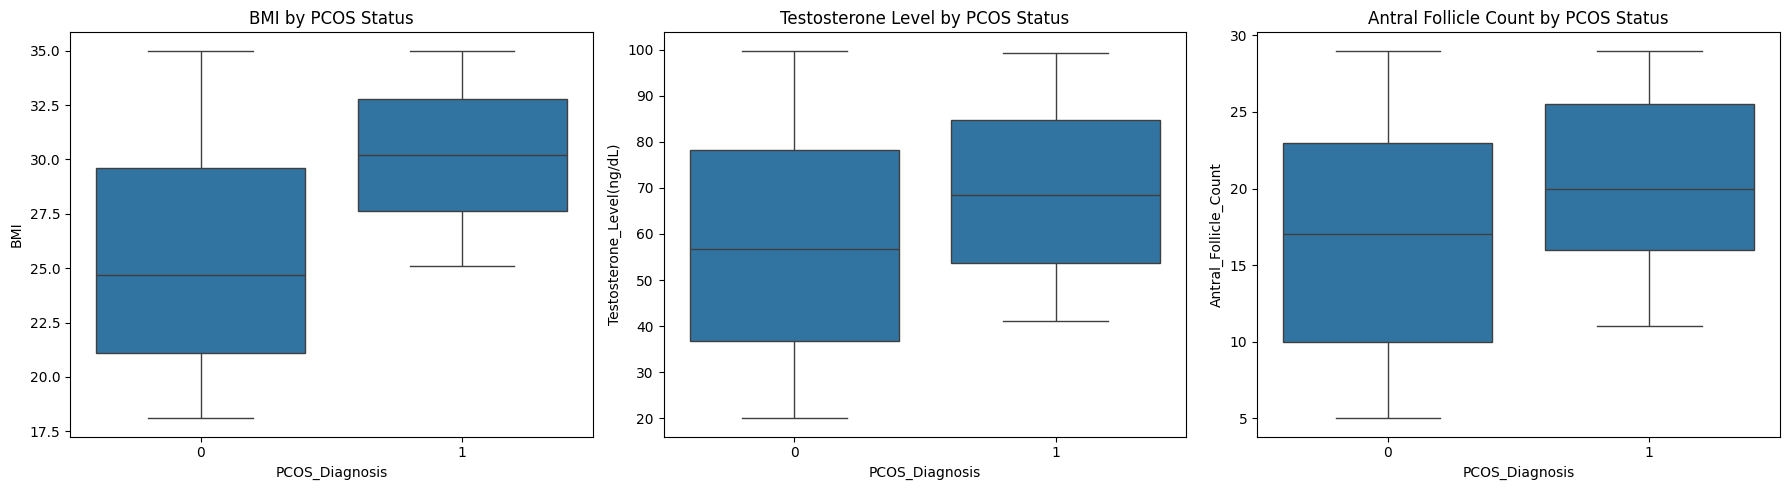

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Resampled class distribution:
 PCOS_Diagnosis
0    561
1    561
Name: count, dtype: int64
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       240
           1       0.80      0.93      0.86        60

    accuracy                           0.94       300
   macro avg       0.89      0.94      0.91       300
weighted avg       0.95      0.94      0.94       300



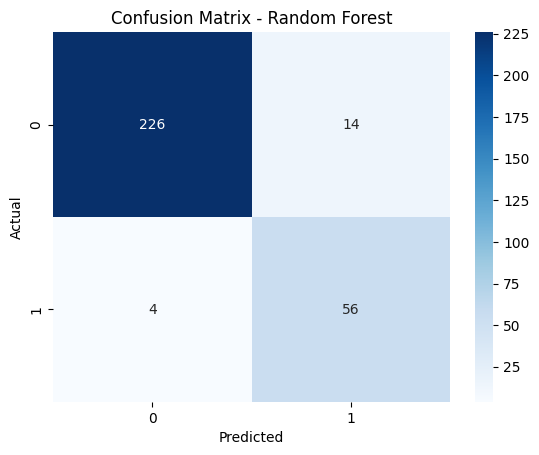

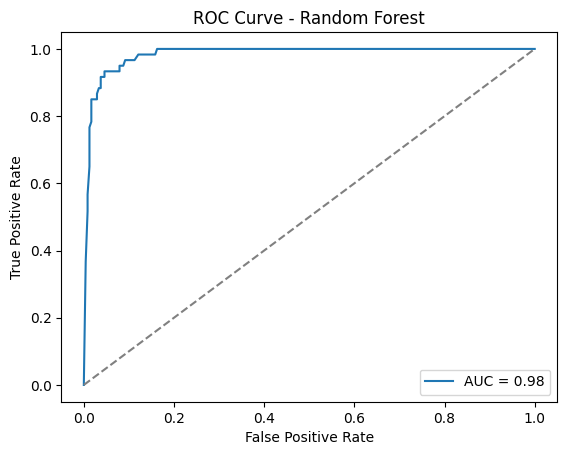


XGBoost Accuracy: 0.9433
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       240
           1       0.82      0.92      0.87        60

    accuracy                           0.94       300
   macro avg       0.90      0.93      0.92       300
weighted avg       0.95      0.94      0.94       300



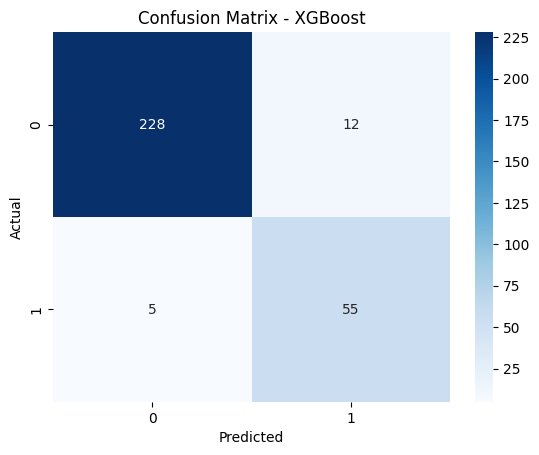

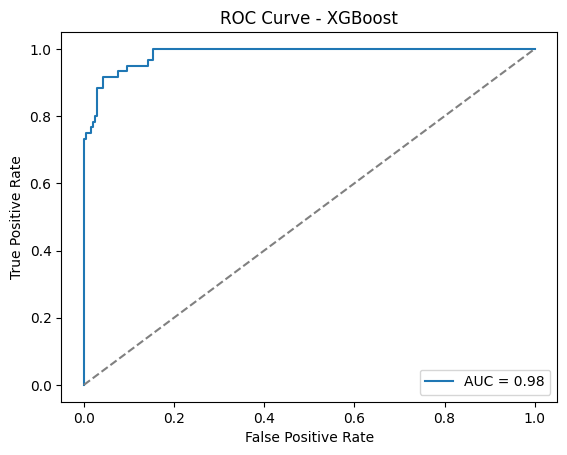


Stacked Ensemble Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       240
           1       0.83      0.92      0.87        60

    accuracy                           0.95       300
   macro avg       0.91      0.94      0.92       300
weighted avg       0.95      0.95      0.95       300



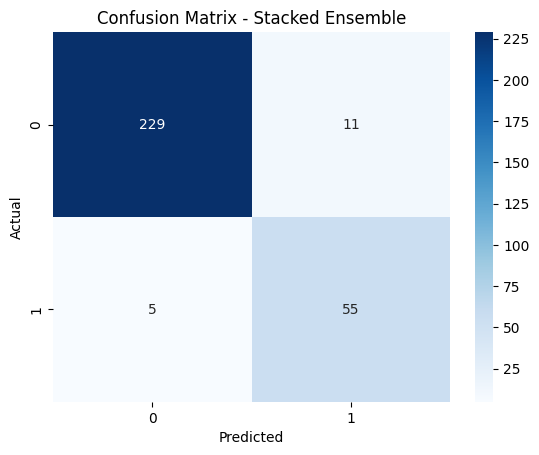

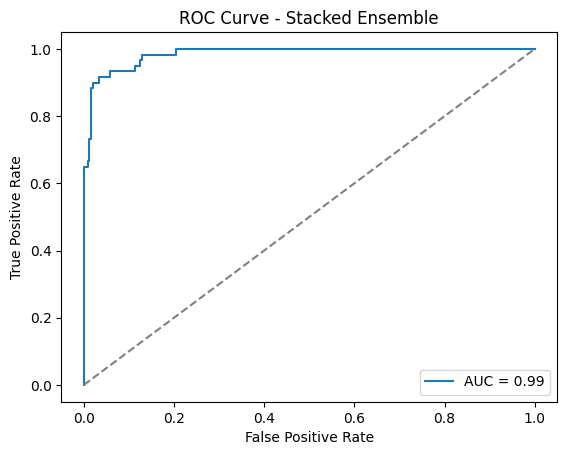

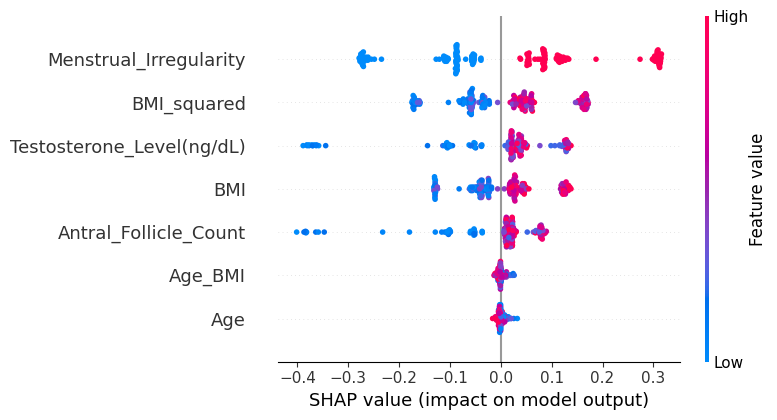

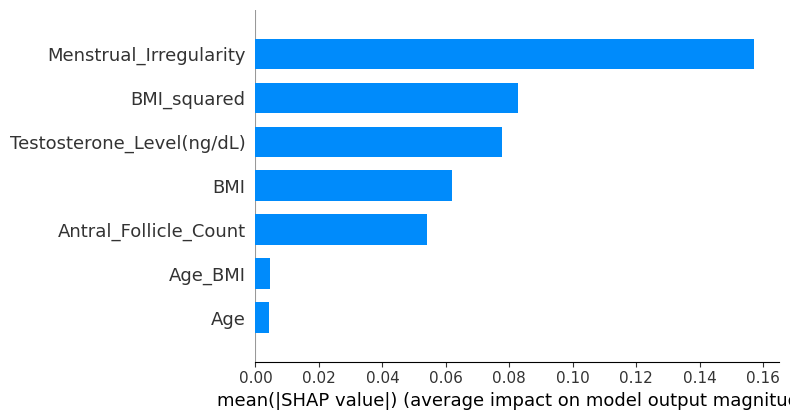


Cross-Validation Scores:
Accuracy: 0.938 ± 0.013
Precision: 0.861 ± 0.048
Recall: 0.824 ± 0.042
F1: 0.841 ± 0.034


In [ ]:

#finalcode
# Install required libraries (Google Colab)
!pip install xgboost shap imbalanced-learn umap-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/pcos_dataset.csv')

# Create engineered features
df['Age_BMI'] = df['Age'] * df['BMI']
df['BMI_squared'] = df['BMI'] ** 2

# Include diagnostic features to boost model performance
selected_features = [
    'Age', 'BMI', 'Age_BMI', 'BMI_squared',
    'Testosterone_Level(ng/dL)',
    'Menstrual_Irregularity',
    'Antral_Follicle_Count'
]
X = df[selected_features]
y = df['PCOS_Diagnosis']

# === 📊 Visualization ===
# Class distribution
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[selected_features + ['PCOS_Diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature distribution by diagnosis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=df, ax=axs[0])
axs[0].set_title('BMI by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=df, ax=axs[1])
axs[1].set_title('Testosterone Level by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Antral_Follicle_Count', data=df, ax=axs[2])
axs[2].set_title('Antral Follicle Count by PCOS Status')
plt.tight_layout()
plt.show()

# === 🔄 Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=5, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:\n", pd.Series(y_train).value_counts())

# === 🤖 Modeling ===
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators':[100,150], 'max_depth':[10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Random Forest best parameters:", grid_rf.best_params_)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
params_xgb = {'n_estimators':[100],'max_depth':[5,7],'learning_rate':[0.05,0.1]}
grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("XGBoost best parameters:", grid_xgb.best_params_)

logreg = LogisticRegression(max_iter=1000, random_state=42)
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_),
        ('lr', logreg)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_clf.fit(X_train, y_train)

# === 📈 Evaluation ===
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.2f}')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

evaluate_model("Random Forest", grid_rf.best_estimator_)
evaluate_model("XGBoost", grid_xgb.best_estimator_)
evaluate_model("Stacked Ensemble", stacking_clf)

# === 🔍 SHAP Analysis ===
X_full = df[selected_features]
y_full = df['PCOS_Diagnosis']
rf_shap = RandomForestClassifier(random_state=42)
rf_shap.fit(X_full, y_full)
X_sub = shap.sample(X_full, 200, random_state=42)
explainer = shap.Explainer(rf_shap, X_sub)
shap_values = explainer(X_sub)
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, show=False)
plt.tight_layout()
plt.show()
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# === 🧪 Cross-validation ===
rf_cv = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'], random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorers = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}
print("\nCross-Validation Scores:")
for name, scorer in scorers.items():
    scores = cross_val_score(rf_cv, X_umap, y, cv=skf, scoring=scorer)
    print(f"{name.capitalize()}: {scores.mean():.3f} ± {scores.std():.3f}")

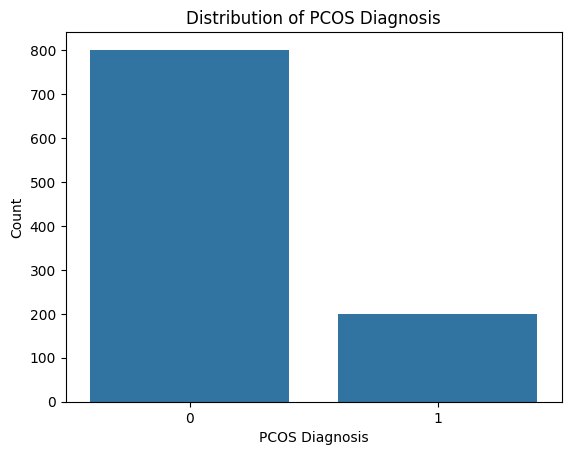

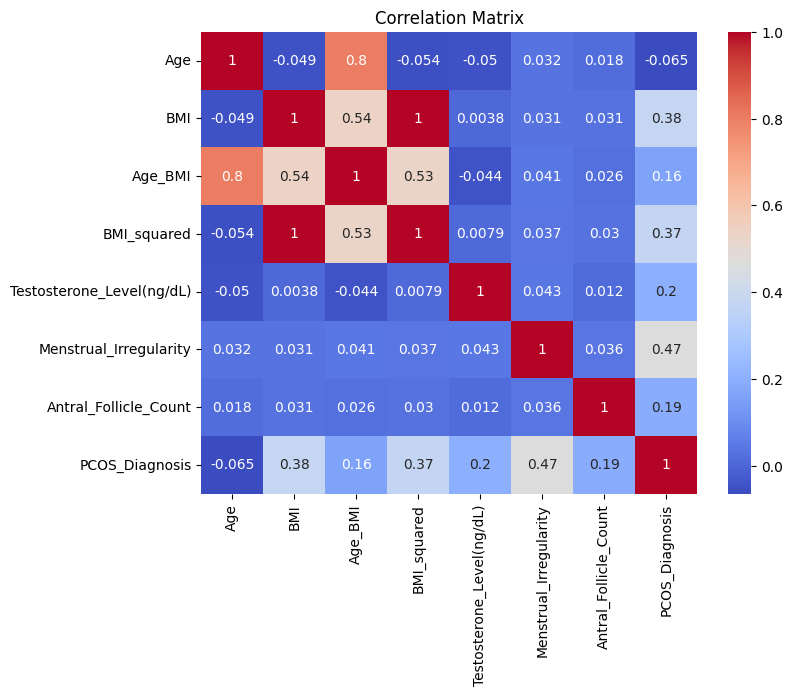

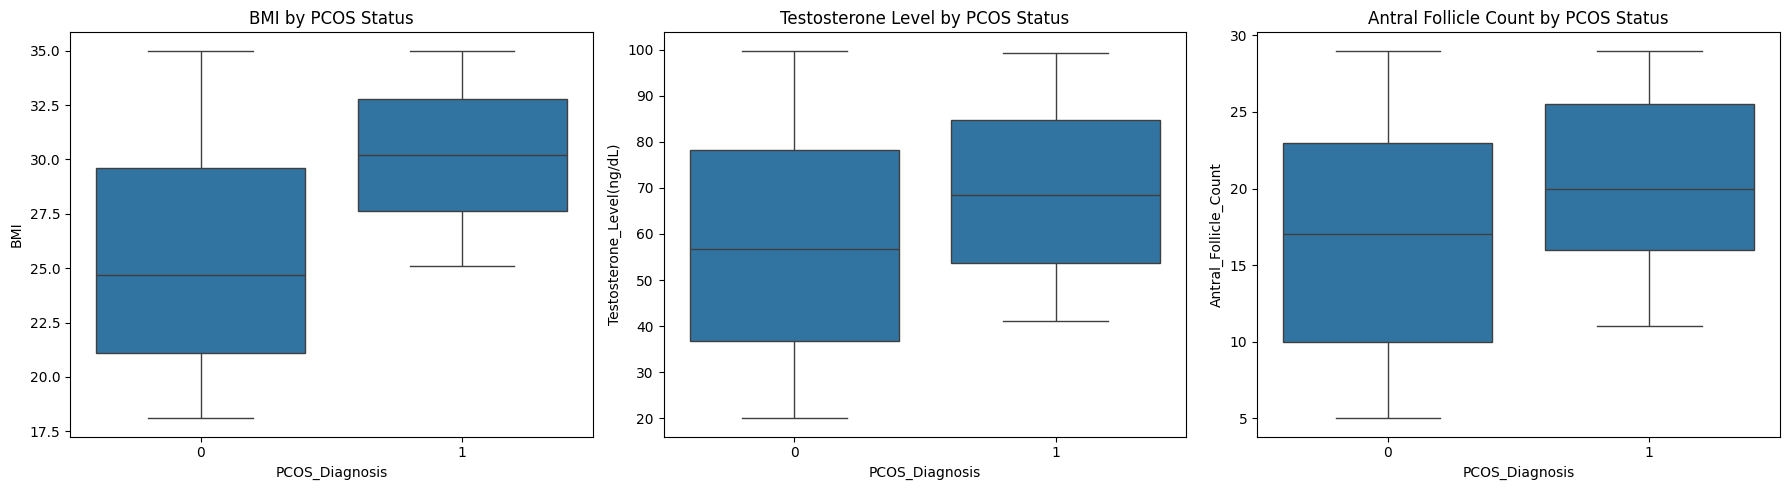

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Resampled class distribution:
 PCOS_Diagnosis
0    561
1    561
Name: count, dtype: int64
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       240
           1       0.80      0.93      0.86        60

    accuracy                           0.94       300
   macro avg       0.89      0.94      0.91       300
weighted avg       0.95      0.94      0.94       300



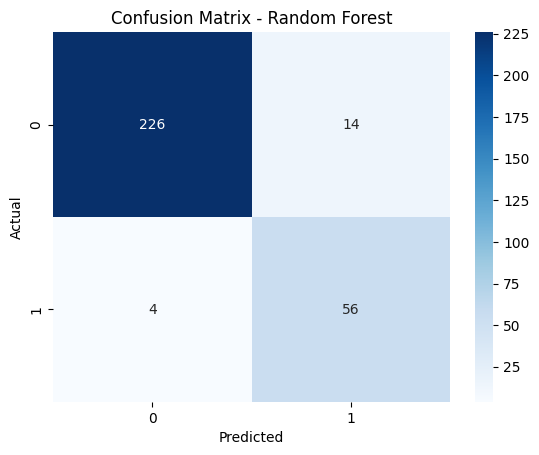

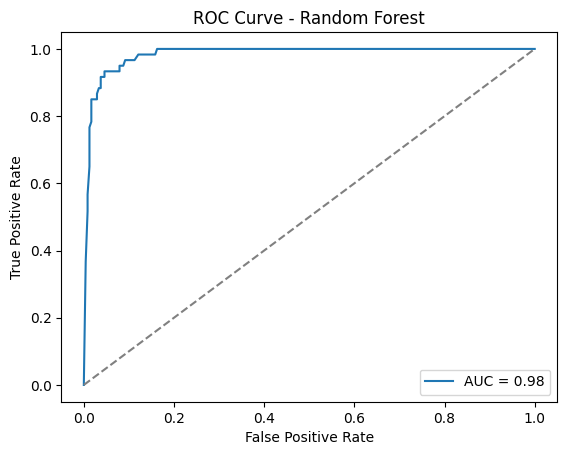


XGBoost Accuracy: 0.9433
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       240
           1       0.82      0.92      0.87        60

    accuracy                           0.94       300
   macro avg       0.90      0.93      0.92       300
weighted avg       0.95      0.94      0.94       300



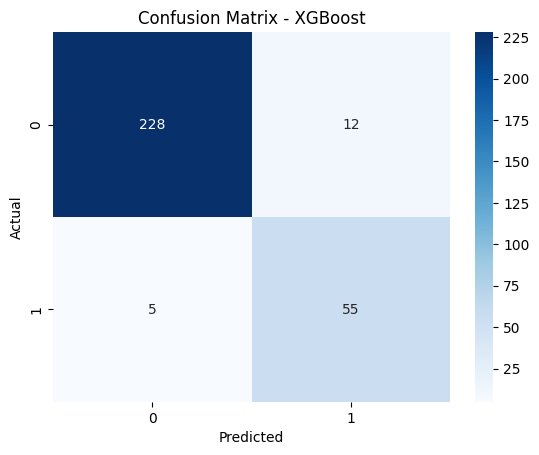

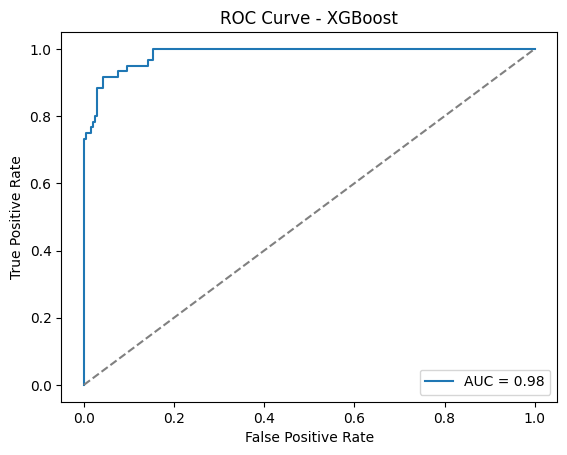


Stacked Ensemble Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       240
           1       0.83      0.92      0.87        60

    accuracy                           0.95       300
   macro avg       0.91      0.94      0.92       300
weighted avg       0.95      0.95      0.95       300



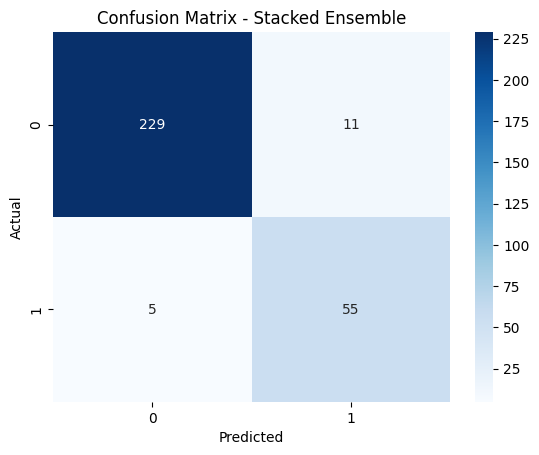

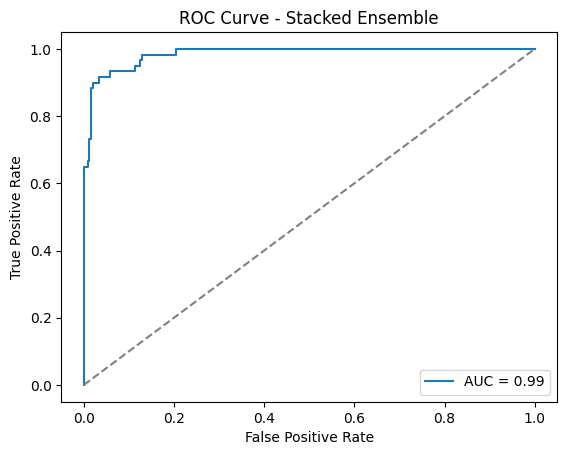

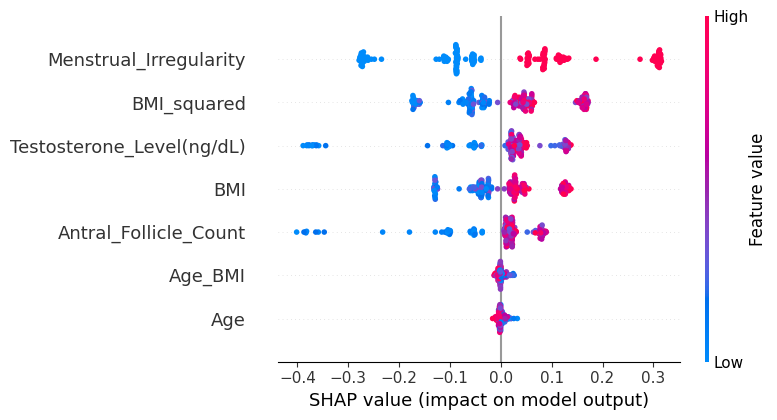

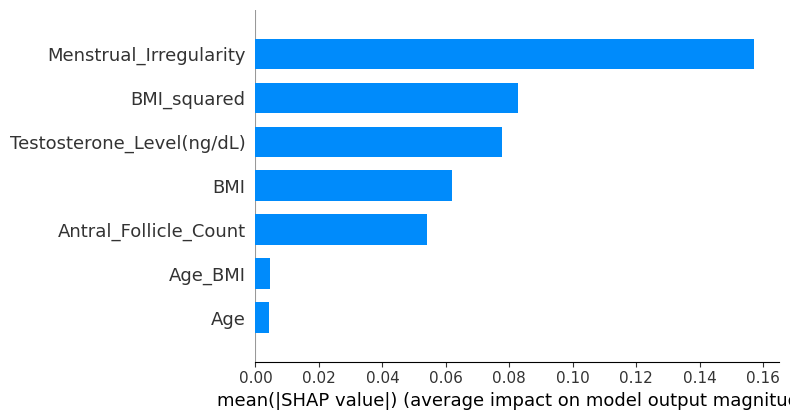


Cross-Validation Scores:
Accuracy: 0.938 ± 0.013
Precision: 0.861 ± 0.048
Recall: 0.824 ± 0.042
F1: 0.841 ± 0.034


In [ ]:
#finalcode
# Install required libraries (Google Colab)
!pip install xgboost shap imbalanced-learn umap-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/pcos_dataset.csv')

# Create engineered features
df['Age_BMI'] = df['Age'] * df['BMI']
df['BMI_squared'] = df['BMI'] ** 2

# Include diagnostic features to boost model performance
selected_features = [
    'Age', 'BMI', 'Age_BMI', 'BMI_squared',
    'Testosterone_Level(ng/dL)',
    'Menstrual_Irregularity',
    'Antral_Follicle_Count'
]
X = df[selected_features]
y = df['PCOS_Diagnosis']

# === 📊 Visualization ===
# Class distribution
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[selected_features + ['PCOS_Diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature distribution by diagnosis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=df, ax=axs[0])
axs[0].set_title('BMI by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=df, ax=axs[1])
axs[1].set_title('Testosterone Level by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Antral_Follicle_Count', data=df, ax=axs[2])
axs[2].set_title('Antral Follicle Count by PCOS Status')
plt.tight_layout()
plt.show()

# === 🔄 Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=5, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:\n", pd.Series(y_train).value_counts())

# === 🤖 Modeling ===
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators':[100,150], 'max_depth':[10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Random Forest best parameters:", grid_rf.best_params_)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
params_xgb = {'n_estimators':[100],'max_depth':[5,7],'learning_rate':[0.05,0.1]}
grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("XGBoost best parameters:", grid_xgb.best_params_)

logreg = LogisticRegression(max_iter=1000, random_state=42)
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_),
        ('lr', logreg)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_clf.fit(X_train, y_train)

# === 📈 Evaluation ===
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.2f}')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

evaluate_model("Random Forest", grid_rf.best_estimator_)
evaluate_model("XGBoost", grid_xgb.best_estimator_)
evaluate_model("Stacked Ensemble", stacking_clf)

# === 🔍 SHAP Analysis ===
X_full = df[selected_features]
y_full = df['PCOS_Diagnosis']
rf_shap = RandomForestClassifier(random_state=42)
rf_shap.fit(X_full, y_full)
X_sub = shap.sample(X_full, 200, random_state=42)
explainer = shap.Explainer(rf_shap, X_sub)
shap_values = explainer(X_sub)
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, show=False)
plt.tight_layout()
plt.show()
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# === 🧪 Cross-validation ===
rf_cv = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'], random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorers = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}
print("\nCross-Validation Scores:")
for name, scorer in scorers.items():
    scores = cross_val_score(rf_cv, X_umap, y, cv=skf, scoring=scorer)
    print(f"{name.capitalize()}: {scores.mean():.3f} ± {scores.std():.3f}")

In [ ]:
!pip install imbalanced-learn


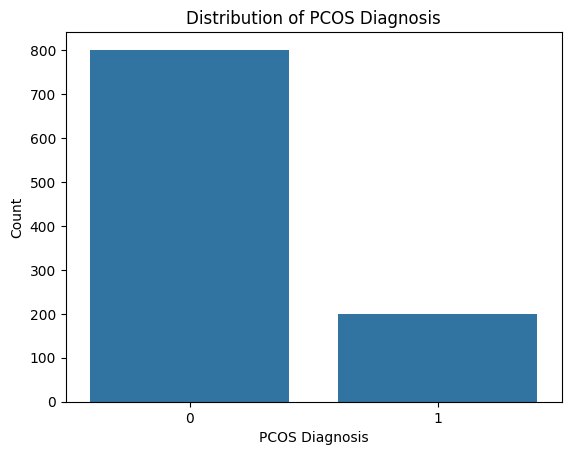

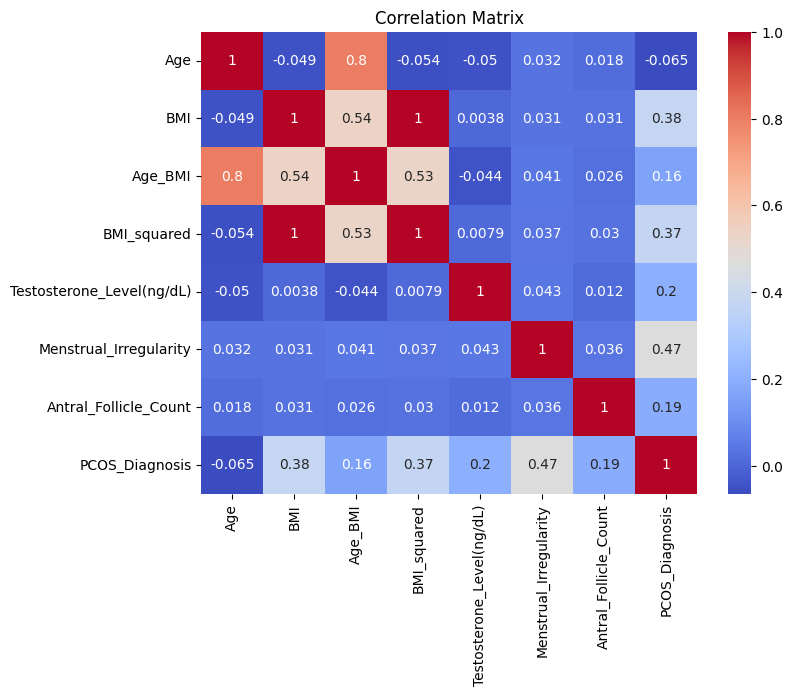

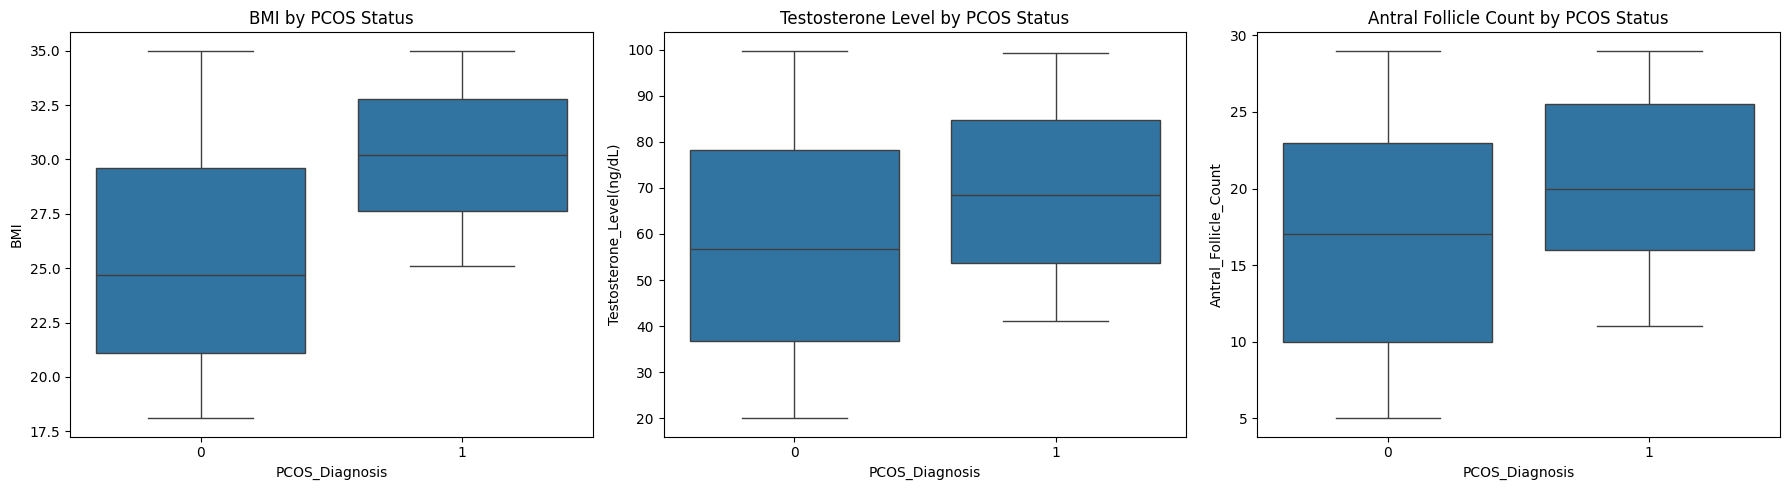

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Resampled class distribution:
 PCOS_Diagnosis
0    561
1    561
Name: count, dtype: int64
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       240
           1       0.80      0.93      0.86        60

    accuracy                           0.94       300
   macro avg       0.89      0.94      0.91       300
weighted avg       0.95      0.94      0.94       300



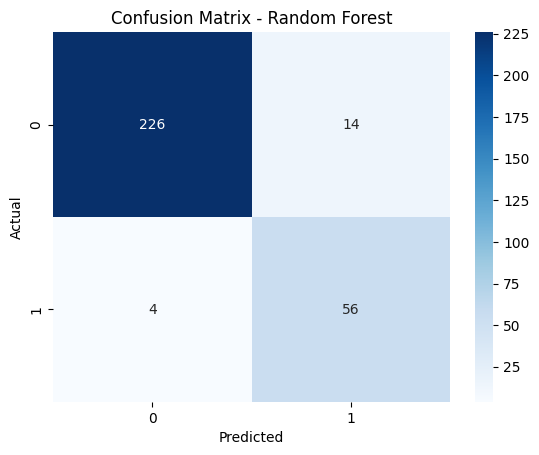

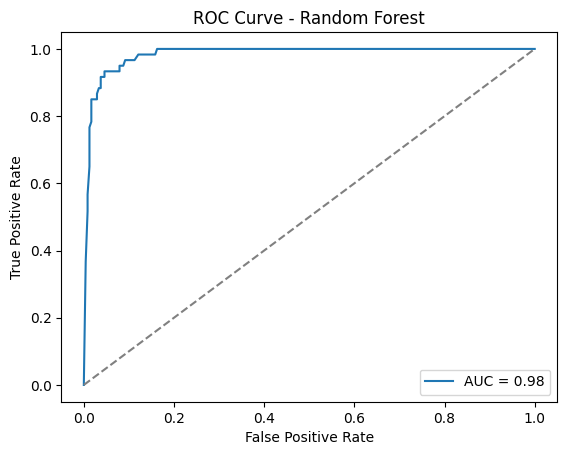


XGBoost Accuracy: 0.9433
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       240
           1       0.82      0.92      0.87        60

    accuracy                           0.94       300
   macro avg       0.90      0.93      0.92       300
weighted avg       0.95      0.94      0.94       300



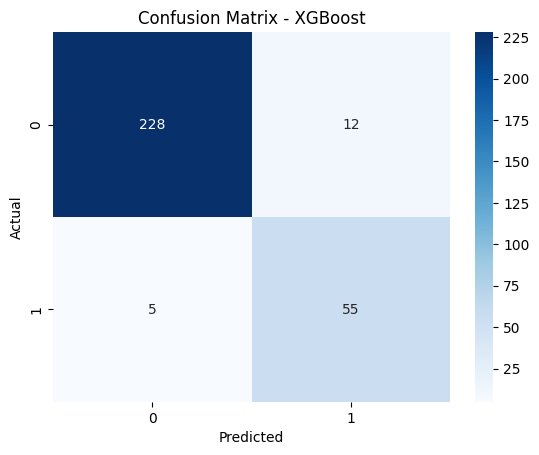

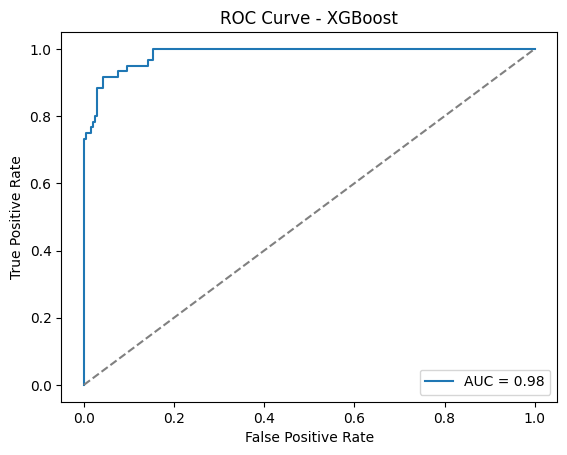


Stacked Ensemble Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       240
           1       0.83      0.92      0.87        60

    accuracy                           0.95       300
   macro avg       0.91      0.94      0.92       300
weighted avg       0.95      0.95      0.95       300



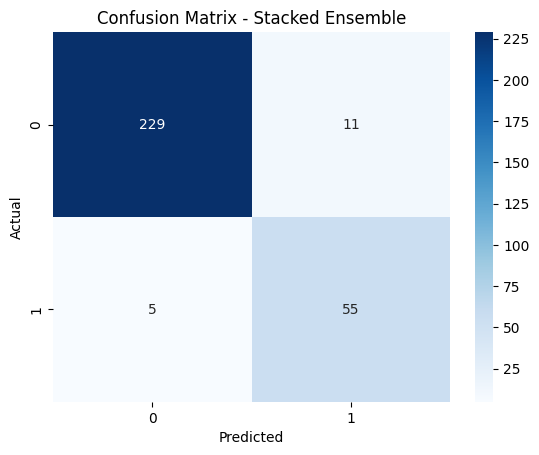

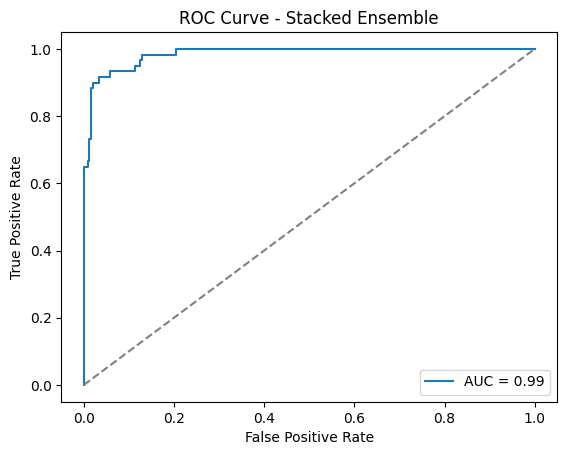

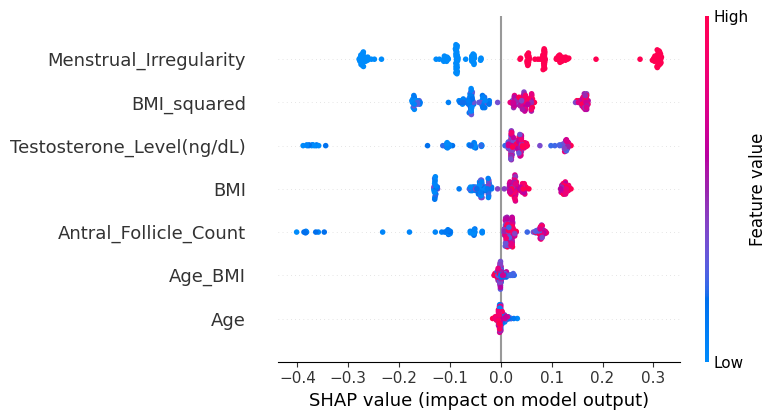

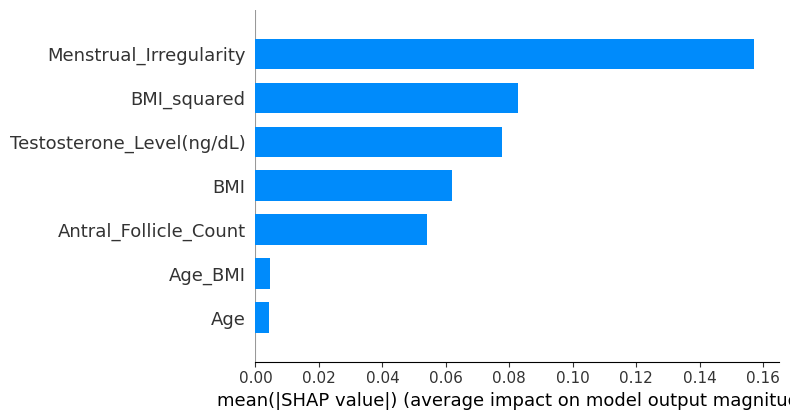


Cross-Validation Scores:
Accuracy: 0.938 ± 0.013
Precision: 0.861 ± 0.048
Recall: 0.824 ± 0.042
F1: 0.841 ± 0.034


In [ ]:
# Install required libraries (Google Colab)
!pip install xgboost shap imbalanced-learn umap-learn


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/pcos_dataset.csv')

# Create engineered features
df['Age_BMI'] = df['Age'] * df['BMI']
df['BMI_squared'] = df['BMI'] ** 2

# Include diagnostic features to boost model performance
selected_features = [
    'Age', 'BMI', 'Age_BMI', 'BMI_squared',
    'Testosterone_Level(ng/dL)',
    'Menstrual_Irregularity',
    'Antral_Follicle_Count'
]
X = df[selected_features]
y = df['PCOS_Diagnosis']

# === 📊 Visualization ===
# Class distribution
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[selected_features + ['PCOS_Diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature distribution by diagnosis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=df, ax=axs[0])
axs[0].set_title('BMI by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=df, ax=axs[1])
axs[1].set_title('Testosterone Level by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Antral_Follicle_Count', data=df, ax=axs[2])
axs[2].set_title('Antral Follicle Count by PCOS Status')
plt.tight_layout()
plt.show()

# === 🔄 Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=5, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:\n", pd.Series(y_train).value_counts())

# === 🤖 Modeling ===
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators':[100,150], 'max_depth':[10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Random Forest best parameters:", grid_rf.best_params_)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
params_xgb = {'n_estimators':[100],'max_depth':[5,7],'learning_rate':[0.05,0.1]}
grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("XGBoost best parameters:", grid_xgb.best_params_)

logreg = LogisticRegression(max_iter=1000, random_state=42)
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_),
        ('lr', logreg)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_clf.fit(X_train, y_train)

# === 📈 Evaluation ===
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.2f}')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

evaluate_model("Random Forest", grid_rf.best_estimator_)
evaluate_model("XGBoost", grid_xgb.best_estimator_)
evaluate_model("Stacked Ensemble", stacking_clf)

# === 🔍 SHAP Analysis ===
X_full = df[selected_features]
y_full = df['PCOS_Diagnosis']
rf_shap = RandomForestClassifier(random_state=42)
rf_shap.fit(X_full, y_full)
X_sub = shap.sample(X_full, 200, random_state=42)
explainer = shap.Explainer(rf_shap, X_sub)
shap_values = explainer(X_sub)
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, show=False)
plt.tight_layout()
plt.show()
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# === 🧪 Cross-validation ===
rf_cv = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'], random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorers = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}
print("\nCross-Validation Scores:")
for name, scorer in scorers.items():
    scores = cross_val_score(rf_cv, X_umap, y, cv=skf, scoring=scorer)
    print(f"{name.capitalize()}: {scores.mean():.3f} ± {scores.std():.3f}")

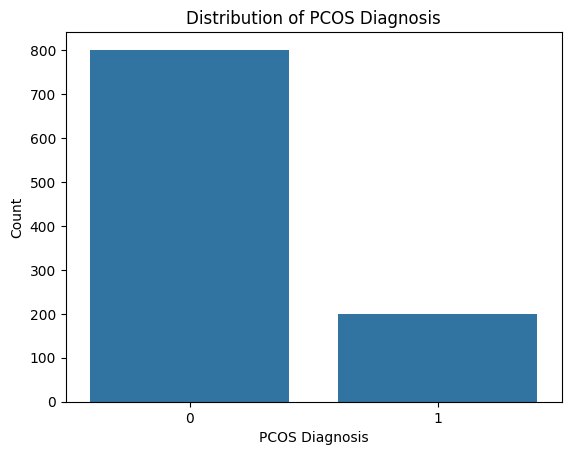

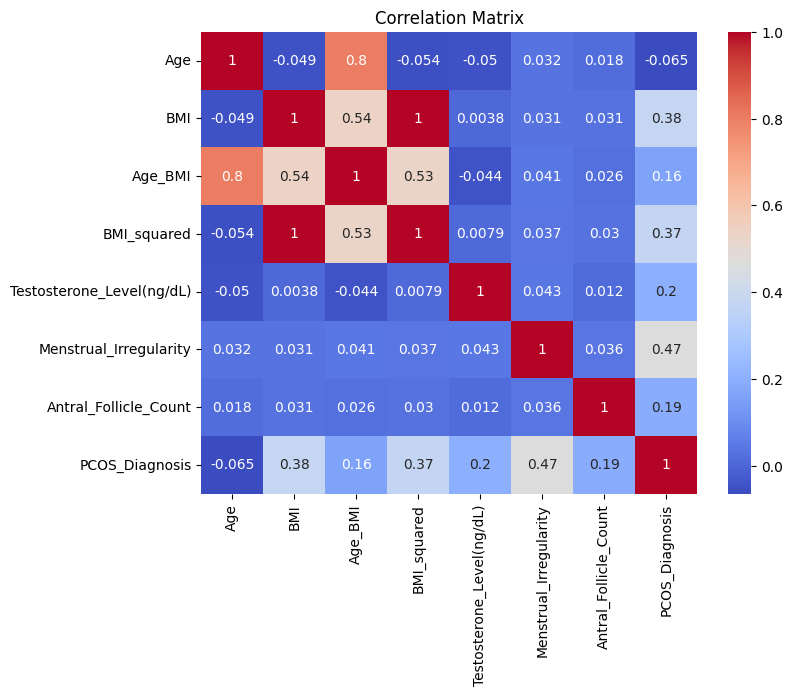

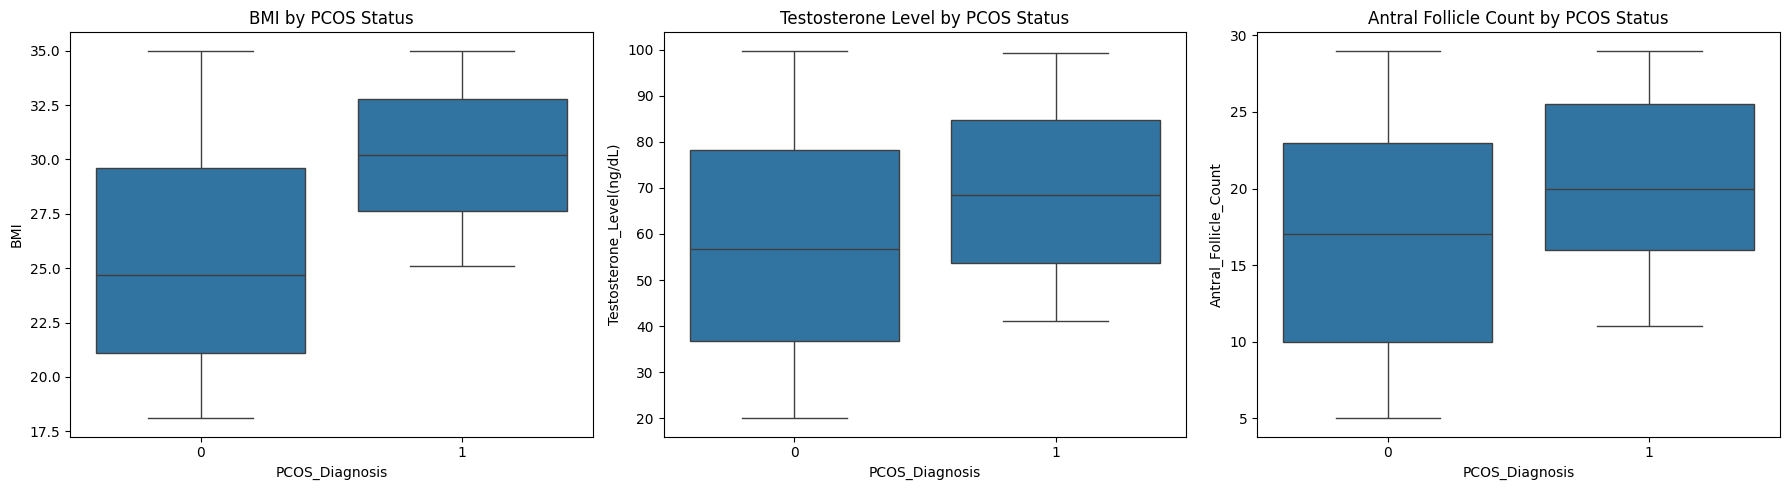

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Resampled class distribution:
 PCOS_Diagnosis
0    561
1    561
Name: count, dtype: int64
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       240
           1       0.80      0.93      0.86        60

    accuracy                           0.94       300
   macro avg       0.89      0.94      0.91       300
weighted avg       0.95      0.94      0.94       300



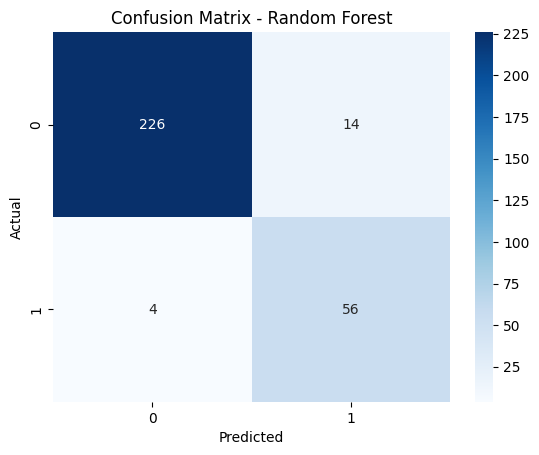

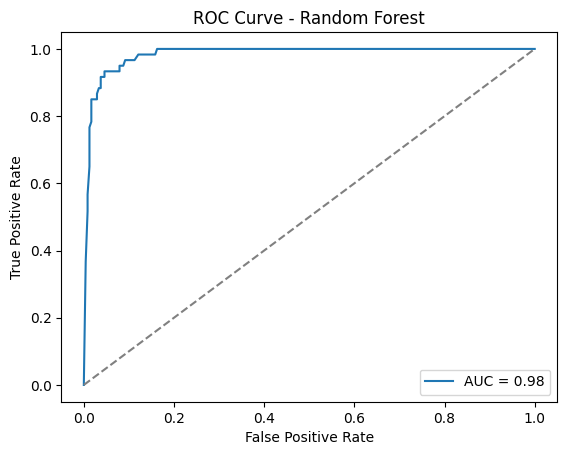


XGBoost Accuracy: 0.9433
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       240
           1       0.82      0.92      0.87        60

    accuracy                           0.94       300
   macro avg       0.90      0.93      0.92       300
weighted avg       0.95      0.94      0.94       300



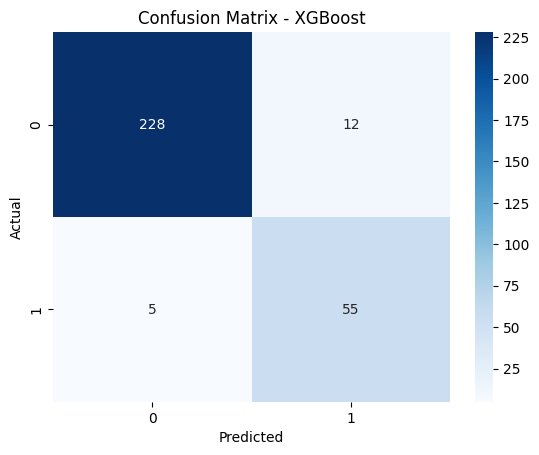

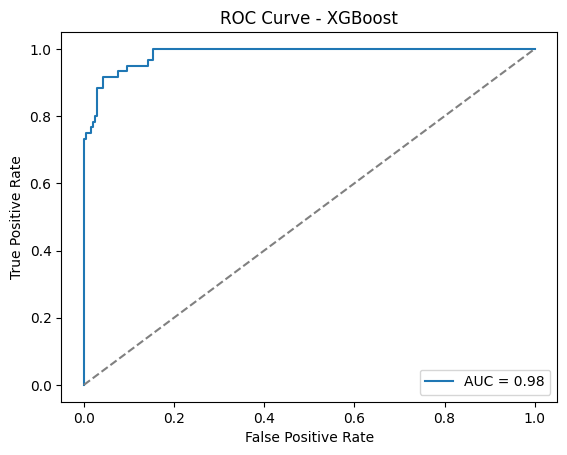


Stacked Ensemble Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       240
           1       0.83      0.92      0.87        60

    accuracy                           0.95       300
   macro avg       0.91      0.94      0.92       300
weighted avg       0.95      0.95      0.95       300



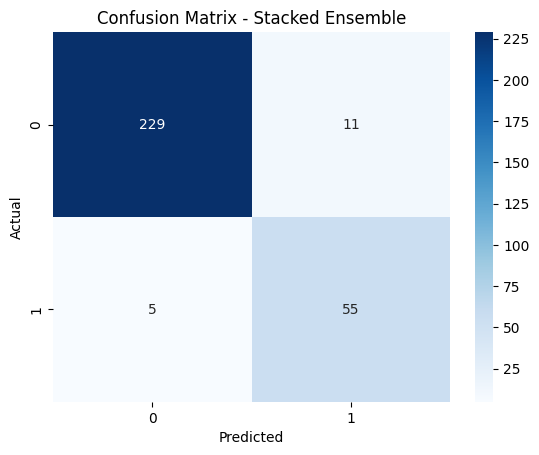

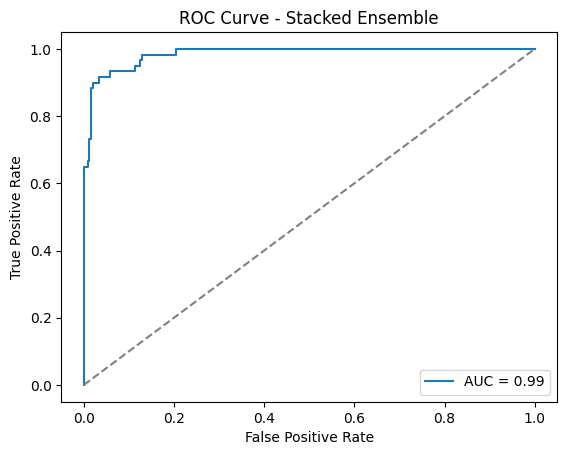

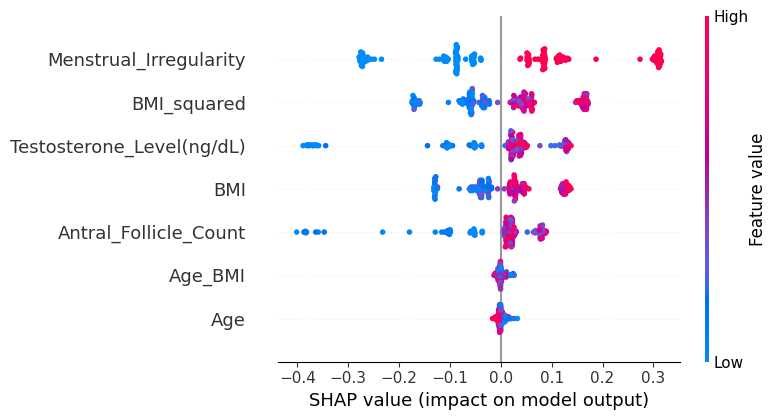

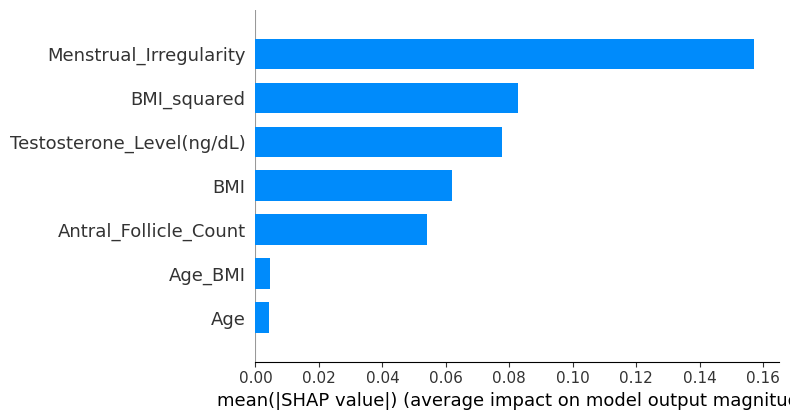


Cross-Validation Scores:
Accuracy: 0.938 ± 0.013
Precision: 0.861 ± 0.048
Recall: 0.824 ± 0.042
F1: 0.841 ± 0.034


In [ ]:
# Install required libraries (Google Colab)
!pip install xgboost shap imbalanced-learn umap-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/pcos_dataset.csv')

# Create engineered features
df['Age_BMI'] = df['Age'] * df['BMI']
df['BMI_squared'] = df['BMI'] ** 2

# Include diagnostic features to boost model performance
selected_features = [
    'Age', 'BMI', 'Age_BMI', 'BMI_squared',
    'Testosterone_Level(ng/dL)',
    'Menstrual_Irregularity',
    'Antral_Follicle_Count'
]
X = df[selected_features]
y = df['PCOS_Diagnosis']

# === 📊 Visualization ===
# Class distribution
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[selected_features + ['PCOS_Diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature distribution by diagnosis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=df, ax=axs[0])
axs[0].set_title('BMI by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=df, ax=axs[1])
axs[1].set_title('Testosterone Level by PCOS Status')
sns.boxplot(x='PCOS_Diagnosis', y='Antral_Follicle_Count', data=df, ax=axs[2])
axs[2].set_title('Antral Follicle Count by PCOS Status')
plt.tight_layout()
plt.show()

# === 🔄 Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=5, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:\n", pd.Series(y_train).value_counts())

# === 🤖 Modeling ===
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators':[100,150], 'max_depth':[10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Random Forest best parameters:", grid_rf.best_params_)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
params_xgb = {'n_estimators':[100],'max_depth':[5,7],'learning_rate':[0.05,0.1]}
grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("XGBoost best parameters:", grid_xgb.best_params_)

logreg = LogisticRegression(max_iter=1000, random_state=42)
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_),
        ('lr', logreg)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_clf.fit(X_train, y_train)

# === 📈 Evaluation ===
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.2f}')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

evaluate_model("Random Forest", grid_rf.best_estimator_)
evaluate_model("XGBoost", grid_xgb.best_estimator_)
evaluate_model("Stacked Ensemble", stacking_clf)

# === 🔍 SHAP Analysis ===
X_full = df[selected_features]
y_full = df['PCOS_Diagnosis']
rf_shap = RandomForestClassifier(random_state=42)
rf_shap.fit(X_full, y_full)
X_sub = shap.sample(X_full, 200, random_state=42)
explainer = shap.Explainer(rf_shap, X_sub)
shap_values = explainer(X_sub)
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, show=False)
plt.tight_layout()
plt.show()
shap.summary_plot(shap_values.values[:,:,1], X_sub, feature_names=selected_features, plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# === 🧪 Cross-validation ===
rf_cv = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'], random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorers = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}
print("\nCross-Validation Scores:")
for name, scorer in scorers.items():
    scores = cross_val_score(rf_cv, X_umap, y, cv=skf, scoring=scorer)
    print(f"{name.capitalize()}: {scores.mean():.3f} ± {scores.std():.3f}")